# Information Visualization Hands-on

## Introduction

Welcome the information visualization Hands-on of this visualization course. This IPython notebook contains all the course material regarding this course.

This Information Visualization Hands-on will give you a brief introduction in information visualization with Python, Pandas, Networkx and Folium. This information visualization techniques covered in this hands-on are:
- Scatterplot and scatterplot matrix
- Parallel Coordinate plot
- Network graphs
- Plotting information on geographical maps

The Information Visualization Hands-on is given in this IPython notebook in a Jupyter environment for convenience for both you, the student, and me, the instructor. It gives an interactive environment with both Markdown text cells for instructions and code cells for executions of code snippets without any installations required on the student side. 

This Jupyter environment requires a small introduction of the basic Jupyter interface and controls. What you are reading from now is a **cell** and to be more specific a **Markdown text cell**. All the course instructions are contained within these **Markdown text cells**. 

The cell you see below is a **code cell** which will contain the python code snippets for you to execute. Now lets go to the Python cell by navigating to it and select it with the **ARROW KEYS** or by **left-clicking** on it with your mouse. Once selected the cell can be executed by pressing **CTRL-ENTER**.

In [1]:
from IPython.display import display, HTML
print('Hello world!');
display(HTML('<img src="./data/images/greatjob.gif">'))

Hello world!


Cool, you executed your first Python code for this Information Visualization Hands-on in Jupyter!

You can enter the cells and edit their content by selecting the cell with your mouse and press **ENTER**, which will bring you to the editing mode of Jupyter. Once in the editing mode you can leave it by pressing **ESC**.

These are the basics that are needed for this course. If you want to know more you can read the [manual of the Jupyter Notebook](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html).

One final note before we begin, throughout this hands-on there are a couple of exercises. These exercises are marked with 2 horizontal lines were the exercises begin and where they end, like this:

***
***
#### Exercise
*Do exercise here*
***
***

Besides these exercises I will be guiding you through the course material.

## Basic graph introduction example

To get a little more familiar with the Jupyter notebooks and the structure of this course we start of with a simple example of making a graph of an online dataset. This visualization is made with the **Pandas** python package. Pandas at its core is a data manipulation and analysis tool but it also brings along some convenient visualizations. Pandas makes it really easy to read/write, index, align, reshape, slice, merge and join datasets.

There are two basic data types within Pandas to work with, **Series** and **DataFrames**. **Series** is a basic and one dimensional dataset and **DataFrames** (with which you are going to work with) are multi-dimensional datasets.

First we will need to import all the necessary packages and modules for this exercise.

In [2]:
import matplotlib                   # Matplotlib is the core package plot publication grade images
import matplotlib.pyplot as plt     # Pyplot: a collection functions that make matplotlib work like MATLAB
import pandas as pd                 # Pandas is the data analysis and 'visualization' package 
import datetime                     # A datetime module supplies classes for manipulating dates and times.
import pandas_datareader.data as web  # The data module extract data from various remote sources into a DataFrame. 
import yfinance as yf               # A module that adds yahoo finance to the pandas_datareader
yf.pdr_override()

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) # Change the default figsize to be a little wider

# This is a line magic command (IPython functionality) to make the plots interactive
%matplotlib nbagg

Now that we imported the necessary packages and modules we can start with collecting our data. For this exercise we will be using IEX's stock data and it just so happens to be that the pandas package has its own stock data readers. Lets first load the stock history of Advanced Mirco Devices (AMD) into a Pandas DataFrame.

<div class="alert alert-info">
The <b>yfinance</b> module generates and deprecation warning, as this is a data source for demonstrative purposes only it can be ignored in this course material.
</div>

In [3]:
# The data reader 
stockHistory = web.get_data_yahoo(['AMD'],                          # Stock Symbol of the company
                                 start=datetime.datetime(2015, 1, 1),# The starting date of your data
                                 end=datetime.datetime(2017, 6, 10));# The end date of your data
stockHistory

/projects/jhssrf019/JHS_installations/Python/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,2.67,0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600
...,...,...,...,...,...,...
2017-06-05,10.84,11.34,10.80,11.24,11.24,66207300
2017-06-06,11.27,12.24,11.24,12.03,12.03,114998600
2017-06-07,12.42,12.96,12.23,12.38,12.38,151005900


We now loaded our first DataFrame with Pandas! As you can see the **stockHistory** DataFrame consists of a data entry (row) for each day and multiple columns, Open (opening price), High (highest price), Low (lowest price), Close (closing price) and Volume (number of shares sold) of the day.

### Basic graph

Now that our Advanced Micro Devices stock history DataFrame is loaded we can have a look at it with a very basic visualization, the **graph**. In this dataset the volume column has relatively large values compared to the other columns. If we were to plot them all on the same y-axis you wouldn't be able to read the other columns. That is why we are going to use a double y-axis. Once the graph is loaded you can also interact with the graph with the buttons below the graph.

<IPython.core.display.Javascript object>


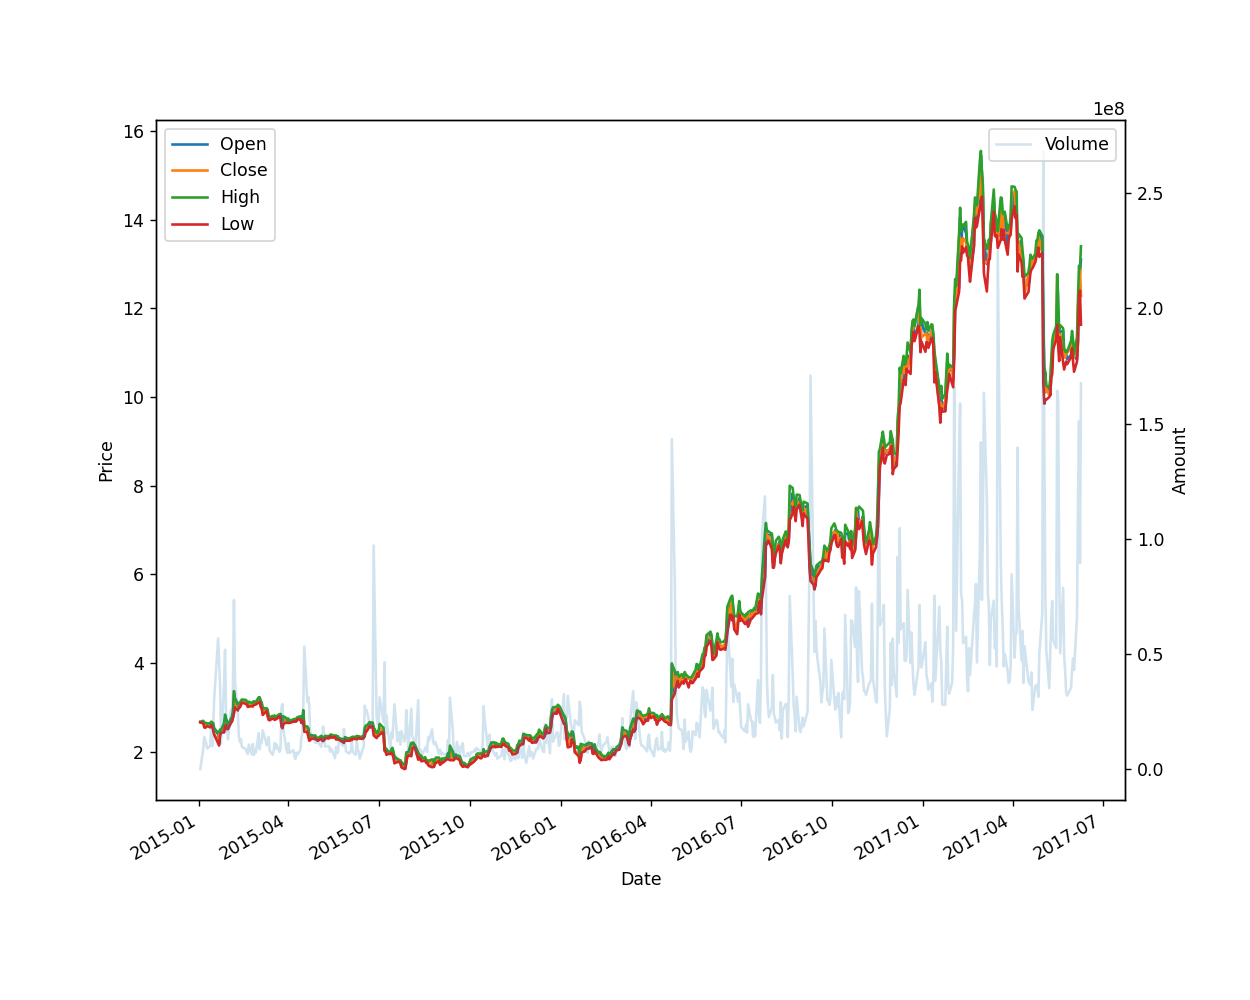

In [4]:
%matplotlib nbagg

fig = plt.figure()         # Create matplotlib figure
ax1 = fig.add_subplot(111) # Create matplotlib axes with subplot (1x1x1 = just one plot)
ax2 = ax1.twinx()          # Create another axes that shares the same x-axis as ax1.

# Plotting is as simple as calling plot() on the DataFrame. 
# But because we want a double y-axis we have to do a little more work. 
# We have to pass the right MatplotLib Axes to the plot function.
stockHistory[['Open','Close', 'High','Low']].plot(ax=ax1);
ax1.legend(loc=2); # Add legend of volume

# Lets make the volume line a little opaque to reduce visual clutter by interducing the alpha parameter
stockHistory['Volume'].plot(ax=ax2, alpha=0.2); 
ax2.legend(loc=1); # Add legend of volume

# Give both y-axis the right name corresponding to the stock prices and the volume.
ax1.set_ylabel('Price');
ax2.set_ylabel('Amount');

From this graph you can see that AMD's stocks increased around 600% from February 2016 to December 2016 which is caused by, among other things, some major contract deals to use their GPU's in cloud solution of Google and Alibaba and their introduction of their new architectures of both their GPU's, the Polaris architecture, and their CPU's, the Zen architecture.

* * *
* * *

A little fun feature of Matplotlib is that you can have different plot styles and one of them is the XKCD style. For the people who don't know [xkcd](https://www.xkcd.com), have fun, but after the course ;). 

<IPython.core.display.Javascript object>


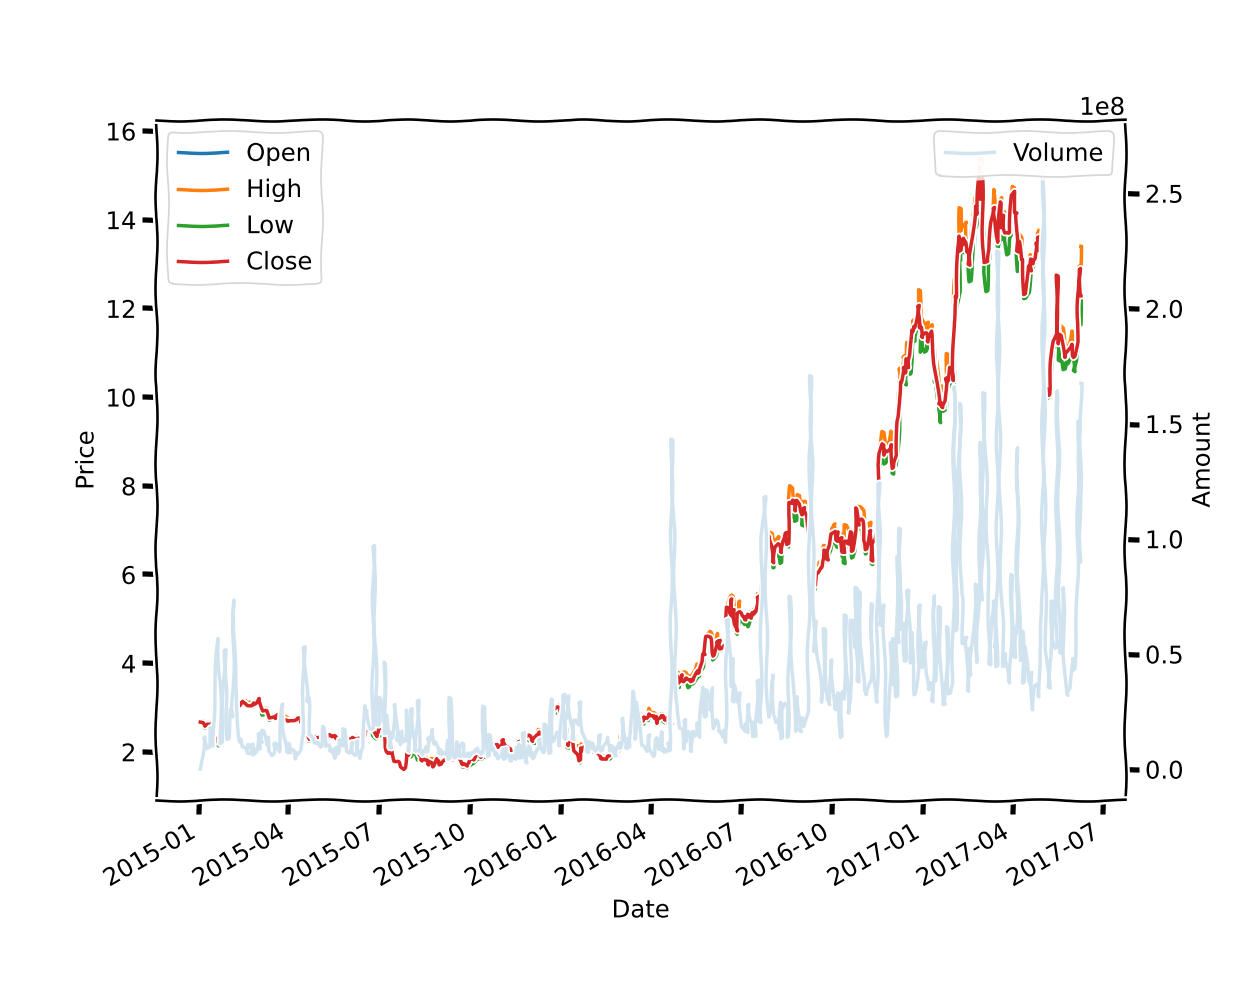

In [5]:
with plt.xkcd():
    fig = plt.figure()         # Create matplotlib figure
    ax1 = fig.add_subplot(111) # Create matplotlib axes with subplot (1x1x1 = just one plot)
    ax2 = ax1.twinx()          # Create another axes that shares the same x-axis as ax1.

    # Plotting is as simple as calling plot() on the DataFrame. 
    # But because we want a double y-axis we have to do a little more work. 
    # We have to pass the right MatplotLib Axes to the plot function.
    stockHistory[['Open','High','Low','Close']].plot(ax=ax1);
    ax1.legend(loc=2); # Add legend of volume

    # Lets make the volume line a little opaque to reduce visual clutter
    stockHistory['Volume'].plot(ax=ax2, alpha=0.2); 
    ax2.legend(loc=1); # Add legend of volume

    # Give both y-axis the right name corresponding to the stock prices and the volume.
    ax1.set_ylabel('Price');
    ax2.set_ylabel('Amount');

This concludes the introductory part of the course now you may proceed to the Scatterplot notebook by clicking on the following link: [Scatterplots](./1.&#32;Scatterplots.ipynb).